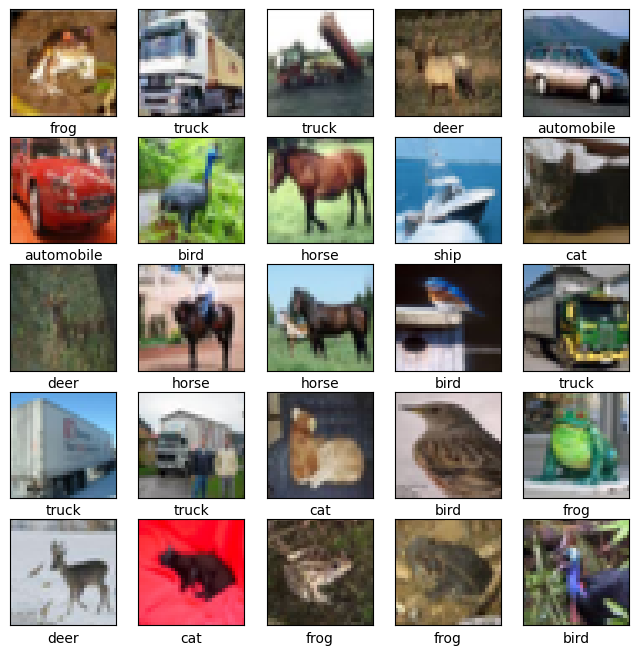

Class counts: Counter({np.uint8(6): 6000, np.uint8(9): 6000, np.uint8(4): 6000, np.uint8(1): 6000, np.uint8(2): 6000, np.uint8(7): 6000, np.uint8(8): 6000, np.uint8(3): 6000, np.uint8(5): 6000, np.uint8(0): 6000})
The CIFAR-10 dataset is balanced.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 16ms/step - accuracy: 0.1640 - loss: 2.3559 - val_accuracy: 0.3726 - val_loss: 1.7166 - learning_rate: 0.1000
Epoch 2/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.3360 - loss: 1.7771 - val_accuracy: 0.4136 - val_loss: 1.5911 - learning_rate: 0.1000
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.3969 - loss: 1.6306 - val_accuracy: 0.4375 - val_loss: 1.5514 - learning_rate: 0.1000
Epoch 4/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.4376 - loss: 1.5423 - val_accuracy: 0.4761 - val_loss: 1.4363 - learning_rate: 0.1000
Epoch 5/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.4561 - loss: 1.4811 - val_accuracy: 0.5365 - val_loss: 1.3069 - learning_rate: 0.1000
Epoch 6/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.4831 - loss: 1.4197 - val_accuracy: 0.5264 - val_loss: 1.3021 - learning_rate: 0.1000
Epoch 7/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.4875 - loss: 

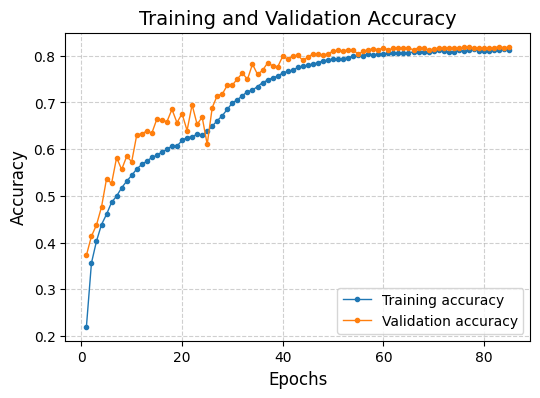

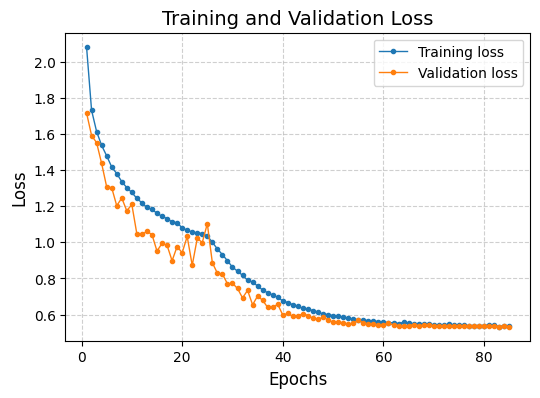

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


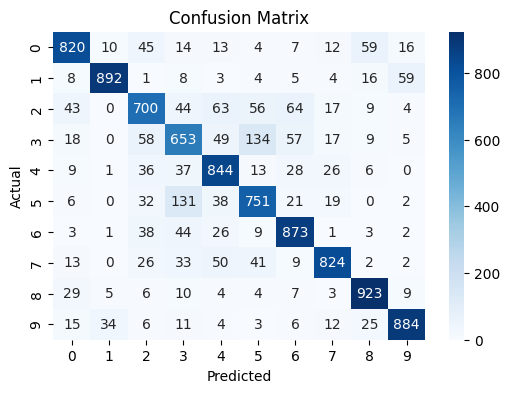

              precision    recall  f1-score   support

    airplane       0.85      0.82      0.84      1000
  automobile       0.95      0.89      0.92      1000
        bird       0.74      0.70      0.72      1000
         cat       0.66      0.65      0.66      1000
        deer       0.77      0.84      0.81      1000
         dog       0.74      0.75      0.74      1000
        frog       0.81      0.87      0.84      1000
       horse       0.88      0.82      0.85      1000
        ship       0.88      0.92      0.90      1000
       truck       0.90      0.88      0.89      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Load Data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Name Classes
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Visualize the Dataset
plt.figure(figsize=(8, 8))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.show()


all_labels = tf.concat([y_train, y_test], axis=0).numpy().flatten()
class_counts = Counter(all_labels)
is_balanced = len(set(class_counts.values())) == 1
print("Class counts:", class_counts)
if is_balanced:
    print("The CIFAR-10 dataset is balanced.")
else:
    print("The CIFAR-10 dataset is NOT balanced.")


y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


# Reshape and Normalize Data
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping,LearningRateScheduler
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import time


# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=25,
    width_shift_range=0.5,
    height_shift_range=0.5,
    shear_range=0.5,
    zoom_range=0.5,
    horizontal_flip=True,
    fill_mode='nearest'
)
INITIAL_LR = 0.1
MOMENTUM = 0.9

optimizer = tf.keras.optimizers.SGD(
    learning_rate=INITIAL_LR,
    momentum=MOMENTUM,
    #  Weight Decay (L2 regularization) for SGD
    weight_decay=1e-3
)
datagen.fit(x_train)

CNN = models.Sequential()
CNN.add(layers.Conv2D(65, (3, 3), padding='same',activation='relu',kernel_initializer='he_normal',input_shape=(32, 32, 3)))
CNN.add(layers.MaxPooling2D(pool_size=(2, 2)))
CNN.add(layers.Dropout(0.2)) #before 0.21

CNN.add(layers.Conv2D(130, (3, 3),activation='relu',kernel_initializer='he_normal',padding='same'))
CNN.add(layers.MaxPooling2D(pool_size=(2, 2)))
CNN.add(layers.Dropout(0.2)) #before 0.21

CNN.add(layers.Conv2D(258, (3, 3),activation='relu',kernel_initializer='he_normal', padding='same'))
CNN.add(layers.MaxPooling2D(pool_size=(2, 2)))
CNN.add(layers.Dropout(0.2)) #before 0.21

#CNN.add(layers.Flatten())
CNN.add(layers.GlobalAveragePooling2D())
#CNN.add(layers.Dense(1024))
CNN.add(layers.Dropout(0.3))

CNN.add(layers.Dense(10, activation='softmax'))


# Compile the model
CNN.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss',
                               min_delta=0.001,
                               patience=10,
                               restore_best_weights=True)

def learning_rate_scheduler(epoch, lr):
    if epoch < 25 :
        return float(lr)
    else:
        return float(lr * tf.math.exp(-0.1))
lr_scheduler = LearningRateScheduler(learning_rate_scheduler)

callbacks_list = [lr_scheduler, early_stopping]

start_time = time.time()

history = CNN.fit(x_train, y_train, epochs=100, batch_size=64,
                    validation_data=(x_test, y_test), callbacks=callbacks_list)
end_time = time.time()


# Evaluate the model
test_loss, test_acc = CNN.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc * 100:.2f}%')

elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

import matplotlib.pyplot as plt

def plot_learning_curve(history, metric='accuracy'):
    # Extract data from history
    train_metric = history.history[metric]
    val_metric = history.history[f'val_{metric}']
    epochs = range(1, len(train_metric) + 1)

    # Plot
    plt.figure(figsize=(6, 4))
    plt.plot(epochs, train_metric, linestyle='-', marker='.', linewidth=1, label=f'Training {metric}')
    plt.plot(epochs, val_metric, linestyle='-', marker='.', linewidth=1, label=f'Validation {metric}')
    plt.title(f'Training and Validation {metric.title()}', fontsize=14)
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel(metric.title(), fontsize=12)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

y_pred_probs = CNN.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

def print_per_class_accuracy(y_true, y_pred, class_names):
    print("\nPer-class accuracy:")
    for i, class_name in enumerate(class_names):
        mask = (y_true == i)
        if np.sum(mask) == 0:
            class_acc = 0.0
        else:
            class_acc = np.mean(y_pred[mask] == y_true[mask]) * 100
        print(f"{class_name}: {class_acc:.2f}%")

print_per_class_accuracy(y_true_labels, y_pred, class_names)
# Plot both accuracy and loss
plot_learning_curve(history, metric='accuracy')  # Plot accuracy curve
plot_learning_curve(history, metric='loss')

from sklearn.metrics import classification_report,confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

y_pred_probs = CNN.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_true_labels, y_pred, target_names=class_names))



In [ ]:
import pickle

# 1. Καθορισμός διαδρομής για το history
history_save_path = '/content/gdrive/My Drive/cnn_history_sgd4.pkl'

# 2. Αποθήκευση του history object
with open(history_save_path, 'wb') as file:
    pickle.dump(history.history, file) # Αποθηκεύουμε το λεξικό .history

print(f"Το ιστορικό αποθηκεύτηκε στη διαδρομή: {history_save_path}")

Το ιστορικό αποθηκεύτηκε στη διαδρομή: /content/gdrive/My Drive/cnn_history_sgd4.pkl


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
 # Ορίστε το δικό σας όνομα αρχείου / φακέλου
save_path = '/content/gdrive/My Drive/cnn_sgd4.keras'

# Αποθήκευση του μοντέλου
CNN.save(save_path)
print(f"Το μοντέλο αποθηκεύτηκε στη διαδρομή: {save_path}")

Το μοντέλο αποθηκεύτηκε στη διαδρομή: /content/gdrive/My Drive/cnn_sgd4.keras
